In [6]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [7]:
# create a main folder path variable (path)
path = r'C:\Users\gra_j\OneDrive\Documents\careerfounfry\Data Immersion\Achievement 4\Instacart Basket Analysis'


In [8]:
#  import the "ords_prods_customers" file from the prepared data
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))

In [9]:
df_all['spending_flag']

0           Low Spender
1           Low Spender
2           Low Spender
3           Low Spender
4           Low Spender
               ...     
32404854    Low Spender
32404855    Low Spender
32404856    Low Spender
32404857    Low Spender
32404858    Low Spender
Name: spending_flag, Length: 32404859, dtype: object

In [10]:
df_all.shape

(32404859, 33)

#### 2. This Data set contain personally indentifiable information such as age, number of dependants, family status, income, surename and first name.

In [11]:
# create a new column "region"  and assign the corresponding region 

df_all['region'] = 'south'

df_all.loc[df_all['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'

df_all.loc[df_all['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

df_all.loc[df_all['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [12]:
# Chek the frecuency of the "region" column
df_all['region'].value_counts(dropna = False)

region
south        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [13]:
# Pivot spending_flag base on region
spend_by_region = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [14]:
# show result of spend by region.
spend_by_region

spending_flag,High spender,Low Spender
region,,
south,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [15]:
# Define low_activity customers
df_all.loc[df_all['order_number'] < 5, 'customer_activity_flag'] = 'low_activity customers'

# Define high_activity customers
df_all.loc[df_all['order_number'] >= 5, 'customer_activity_flag'] = 'high_activity customer'

In [16]:
# check frequency of "customer_activity_flag" column
df_all['customer_activity_flag'].value_counts(dropna= False)

customer_activity_flag
high_activity customer    24414877
low_activity customers     7989982
Name: count, dtype: int64

In [17]:
# look for the minimum age value
df_all['age'].min()

18

In [18]:
# look for the maximum age value
df_all['age'].max()

81

In [19]:
#look for the minimum income value
df_all['income'].min()

25903

In [20]:
# look for the maximum income value
df_all['income'].max()

593901

## customer profiling

The **age** variable will be divided in to three categories: **young adult** (18-39)", **middle age** (40-59), and **senior** (60+)

The **income** variable will be divided in to 3 categories:
**lower class** (25903-55000), **middle class** (55001-149131), **upper class** (149132 +)

In [21]:
# Define lower_class young adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 39) 
         & (df_all['income'] >= 25903) & (df_all['income'] <= 55000),
      
         'customer_profile'] = 'lower-class young adult'

In [22]:
# Define lower_class middle age adult group
df_all.loc[(df_all['age'] >= 40) & (df_all['age'] <= 59) 
         & (df_all['income'] >= 25903) & (df_all['income'] <= 55000),
      
         'customer_profile'] = 'lower_class middle age'

In [23]:
# Define lower_class senior adult group
df_all.loc[(df_all['age'] >= 60) 
         & (df_all['income'] >= 25903) & (df_all['income'] <= 55000),
      
         'customer_profile'] = 'lower_class senior'

In [24]:
# Define middle_class young adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 39) 
         & (df_all['income'] >= 55001) & (df_all['income'] <= 149131),
      
         'customer_profile'] = 'middle_class young adult'

In [25]:
# Define middle_class middle age group
df_all.loc[(df_all['age'] >= 40) & (df_all['age'] <= 59) 
         & (df_all['income'] >= 55001) & (df_all['income'] <= 149131),
      
         'customer_profile'] = 'middle_class middle age'

In [26]:
# Define middle_class senior group
df_all.loc[(df_all['age'] >= 60)  
         & (df_all['income'] >= 55001) & (df_all['income'] <= 149131),
      
         'customer_profile'] = 'middle_class senior'

In [27]:
# Define upper_class young adult group
df_all.loc[(df_all['age'] >= 18) & (df_all['age'] <= 39) 
         & (df_all['income'] >= 149132),
      
         'customer_profile'] = 'upper-class young adult'

In [28]:
# Define upper_class middle age group
df_all.loc[(df_all['age'] >= 40) & (df_all['age'] <= 59) 
         & (df_all['income'] >= 149132),
      
         'customer_profile'] = 'upper-class middle age'

In [29]:
# Define upper_class senior age group
df_all.loc[(df_all['age'] >= 60) 
         & (df_all['income'] >= 149132),
      
         'customer_profile'] = 'upper-class senior'

In [30]:
# Familiy status count by customer profile
prof_fam_status = pd.crosstab(df_all['customer_profile'], df_all['fam_status'], dropna = False)


In [31]:
prof_fam_status

fam_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
lower-class young adult,0,357531,1553035,652392
lower_class middle age,0,0,806772,267486
lower_class senior,264884,0,837885,0
middle_class middle age,0,0,5389804,1776023
middle_class senior,1951305,0,5832854,0
middle_class young adult,0,1177785,5213778,2105474
upper-class middle age,0,0,1432975,500352
upper-class senior,555623,0,1624704,0
upper-class young adult,0,15287,64946,23964


In [32]:
# Number of dependants by customer profile
dependants_by_custprof= pd.crosstab(df_all['customer_profile'], df_all['n_dependants'], dropna = False)

In [33]:
dependants_by_custprof

n_dependants,0,1,2,3
customer_profile,,,,
lower-class young adult,652392,630486,647798,632282
lower_class middle age,267486,272464,264024,270284
lower_class senior,264884,275596,283735,278554
middle_class middle age,1776023,1822405,1760548,1806851
middle_class senior,1951305,1902700,1970116,1960038
middle_class young adult,2105474,2128538,2120542,2142483
upper-class middle age,500352,494729,464536,473710
upper-class senior,555623,528213,552694,543797
upper-class young adult,23964,25973,27150,27110


## 6. Distribution of customer profile

In [34]:
# Chek the frecuency of the "customer_profile" column
df_all['customer_profile'].value_counts(dropna = False)

customer_profile
middle_class young adult    8497037
middle_class senior         7784159
middle_class middle age     7165827
lower-class young adult     2562958
upper-class senior          2180327
upper-class middle age      1933327
lower_class senior          1102769
lower_class middle age      1074258
upper-class young adult      104197
Name: count, dtype: int64

Text(0.5, 0, 'User Count')

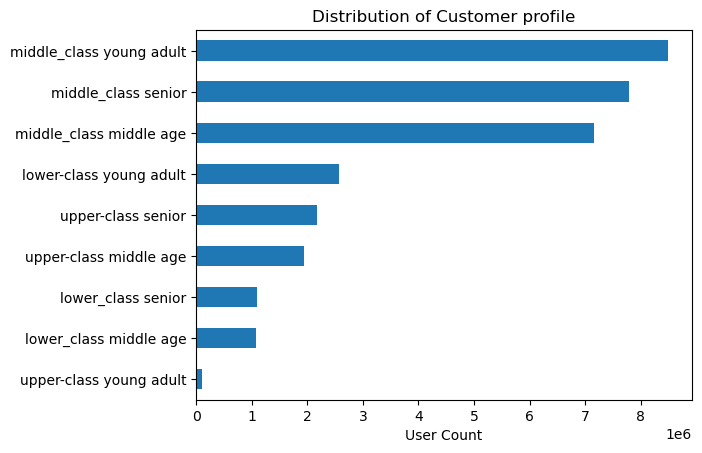

In [35]:
# plot the count of distribution of customer profile
df_all['customer_profile'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Distribution of Customer profile')
plt.ylabel('') 
plt.xlabel('User Count')

In [36]:
# Order frequency by customer profile
freq_by_custprof = df_all.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})

In [37]:
freq_by_custprof

days_since_prior_order           
                                           mean  min   max
customer_profile                                          
lower-class young adult               11.444093  0.0  30.0
lower_class middle age                11.641952  0.0  30.0
lower_class senior                    11.598652  0.0  30.0
middle_class middle age               11.076059  0.0  30.0
middle_class senior                   11.064046  0.0  30.0
middle_class young adult              11.015018  0.0  30.0
upper-class middle age                10.955697  0.0  30.0
upper-class senior                    10.941411  0.0  30.0
upper-class young adult               10.491285  0.0  30.0

In [38]:
# Expenditure by customer profile
price_by_custprof = df_all.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [39]:
price_by_custprof

prices              
                                mean  min      max
customer_profile                                  
lower-class young adult     7.220530  1.0     25.0
lower_class middle age      6.560824  1.0     25.0
lower_class senior          6.503078  1.0     25.0
middle_class middle age     9.248857  1.0  99999.0
middle_class senior         9.110421  1.0  99999.0
middle_class young adult    9.748274  1.0  99999.0
upper-class middle age     25.875972  1.0  99999.0
upper-class senior         23.895261  1.0  99999.0
upper-class young adult   319.988831  1.0  99999.0

## 8. Customer analysis by region 

#### South Region

In [40]:
# Creat subset from "df_all" only containing data from the south region
south_customer = df_all[df_all['region']== 'south']

In [41]:
# south customers statistics
south_customer.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices_of_products,median_days_prior_order,age,n_dependants,income
count,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.009982e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07,1.079188e+07
mean,2.560199e+04,7.121302e+01,9.910016e+00,1.219558e+01,1.710395e+06,1.026769e+05,1.715097e+01,2.740662e+00,1.341689e+01,1.110811e+01,8.356309e+00,5.897414e-01,3.310338e+01,1.219558e+01,1.039685e+01,4.932366e+01,1.503654e+00,9.901112e+04
std,1.408050e+04,3.822257e+01,6.281056e+00,5.086364e+02,9.880421e+05,5.941366e+04,1.759596e+01,2.088016e+00,4.252252e+00,8.786835e+00,7.158940e+00,4.918806e-01,2.531045e+01,8.788383e+01,7.138929e+00,1.854653e+01,1.119043e+00,4.254096e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.591100e+04
25%,1.355400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.538620e+05,5.106900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.385246e+00,6.000000e+00,3.300000e+01,0.000000e+00,6.680200e+04
50%,2.530500e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.709488e+06,1.021100e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.830769e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.610800e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.566695e+06,1.543370e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.265185e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.273850e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421081e+06,2.062040e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.370000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.910890e+05


In [42]:
# User count by customer profile 
south_customer['customer_profile'].value_counts()

customer_profile
middle_class young adult    2873211
middle_class senior         2573310
middle_class middle age     2347811
lower-class young adult      865363
upper-class senior           735277
upper-class middle age       619891
lower_class senior           376996
lower_class middle age       362857
upper-class young adult       37169
Name: count, dtype: int64

In [43]:
# Total spending of the South customers
south_customer['prices'].sum()

131613265.39999999

In [44]:
# Top 5 goods by order
south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(5)

product_name
Banana                    158336
Bag of Organic Bananas    125585
Organic Strawberries       88379
Organic Baby Spinach       81399
Organic Hass Avocado       69833
Name: count, dtype: int64

#### West Region

In [45]:
# Creat subset from "df_all" only containing data from the west region
west_customer = df_all[df_all['region']== 'West']

In [46]:
# west customers statistics
west_customer.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices_of_products,median_days_prior_order,age,n_dependants,income
count,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,7.765088e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06,8.292913e+06
mean,2.558676e+04,7.114691e+01,9.925130e+00,1.131983e+01,1.710503e+06,1.033241e+05,1.727932e+01,2.739336e+00,1.341863e+01,1.104720e+01,8.350196e+00,5.908083e-01,3.330773e+01,1.131983e+01,1.036015e+01,4.957218e+01,1.506987e+00,9.929777e+04
std,1.408697e+04,3.822195e+01,6.282285e+00,4.288414e+02,9.870633e+05,5.943509e+04,1.763512e+01,2.092418e+00,4.229210e+00,8.748503e+00,7.094907e+00,4.916847e-01,2.524567e+01,6.692787e+01,7.127137e+00,1.844750e+01,1.121750e+00,4.262684e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.593700e+04
25%,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.550280e+05,5.171700e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.389324e+00,6.000000e+00,3.400000e+01,1.000000e+00,6.693900e+04
50%,2.529500e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.712200e+06,1.035860e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.700000e+01,7.821429e+00,8.000000e+00,5.000000e+01,2.000000e+00,9.665100e+04
75%,3.792300e+04,1.070000e+02,1.600000e+01,1.120000e+01,2.564961e+06,1.545020e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.252392e+00,1.300000e+01,6.600000e+01,3.000000e+00,1.276970e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,2.062060e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.140000e+02,1.000000e+00,9.900000e+01,1.020999e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [47]:
# User count by customer profile 
west_customer['customer_profile'].value_counts()

customer_profile
middle_class young adult    2156993
middle_class senior         2004761
middle_class middle age     1839762
lower-class young adult      645893
upper-class senior           554089
upper-class middle age       510776
lower_class senior           280181
lower_class middle age       275378
upper-class young adult       25080
Name: count, dtype: int64

In [48]:
# Total spending of the west customers
west_customer['prices'].sum()

93874398.69999997

In [49]:
# Top 5 goods by order
west_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(5)

product_name
Banana                    120557
Bag of Organic Bananas     97710
Organic Strawberries       67790
Organic Baby Spinach       62128
Organic Hass Avocado       56522
Name: count, dtype: int64

#### MidWest Region

In [50]:
# Creat subset from "df_all" only containing data from the Midwest region
midwest_customer = df_all.loc[df_all['region'] == 'Midwest']

In [51]:
# midwest customers statistics
midwest_customer.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices_of_products,median_days_prior_order,age,n_dependants,income
count,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.107586e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06,7.597325e+06
mean,2.561022e+04,7.119132e+01,9.914719e+00,1.271548e+01,1.712679e+06,1.030219e+05,1.692513e+01,2.738748e+00,1.344443e+01,1.118184e+01,8.343326e+00,5.869861e-01,3.258672e+01,1.271548e+01,1.045822e+01,4.944214e+01,1.491636e+00,1.001023e+05
std,1.408583e+04,3.819831e+01,6.280183e+00,5.644385e+02,9.864662e+05,5.935580e+04,1.731500e+01,2.091774e+00,4.249547e+00,8.804468e+00,7.122269e+00,4.923753e-01,2.481497e+01,1.010909e+02,7.129545e+00,1.841051e+01,1.115788e+00,4.452459e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.356500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.610130e+05,5.201100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.390435e+00,6.000000e+00,3.400000e+01,0.000000e+00,6.738000e+04
50%,2.534000e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.712286e+06,1.027490e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.827941e+00,8.000000e+00,4.900000e+01,1.000000e+00,9.725400e+04
75%,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.566551e+06,1.541360e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.600000e+01,8.253731e+00,1.300000e+01,6.500000e+01,2.000000e+00,1.285810e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421075e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.090000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.793970e+05


In [52]:
# Customer profile count
midwest_customer['customer_profile'].value_counts()

customer_profile
middle_class young adult    1980309
middle_class senior         1810050
middle_class middle age     1715242
lower-class young adult      596363
upper-class senior           508535
upper-class middle age       465106
lower_class senior           250953
lower_class middle age       246310
upper-class young adult       24457
Name: count, dtype: int64

In [53]:
# Total spending of the midwest customers
midwest_customer['prices'].sum()

96603658.69999996

In [54]:
# Top 5goods by order
midwest_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(5)

product_name
Banana                    110327
Bag of Organic Bananas     89270
Organic Strawberries       61611
Organic Baby Spinach       56220
Organic Hass Avocado       49434
Name: count, dtype: int64

#### NorthEast Region

In [55]:
# Creat subset from "df_all" only containing data from the NorthEast region
northeast_customer = df_all.loc[df_all['region'] == 'Northeast']

In [56]:
# north_east customers statistics
northeast_customer.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices_of_products,median_days_prior_order,age,n_dependants,income
count,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.356272e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06,5.722736e+06
mean,2.559427e+04,7.124191e+01,9.937227e+00,1.155500e+01,1.709192e+06,1.027551e+05,1.721573e+01,2.734961e+00,1.342459e+01,1.107577e+01,8.361099e+00,5.909806e-01,3.320316e+01,1.155500e+01,1.037370e+01,4.960811e+01,1.504822e+00,9.956287e+04
std,1.408384e+04,3.819226e+01,6.282819e+00,4.623826e+02,9.873391e+05,5.975226e+04,1.756365e+01,2.088306e+00,4.255834e+00,8.774100e+00,7.119696e+00,4.916529e-01,2.517092e+01,6.791330e+01,7.127311e+00,1.852297e+01,1.118338e+00,4.265135e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.100000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.607200e+04
25%,1.355400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.546230e+05,5.093200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.384178e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.705700e+04
50%,2.525600e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710925e+06,1.019220e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.814725e+00,8.000000e+00,5.000000e+01,2.000000e+00,9.678900e+04
75%,3.798700e+04,1.070000e+02,1.600000e+01,1.120000e+01,2.562467e+06,1.547290e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.238650e+00,1.300000e+01,6.600000e+01,3.000000e+00,1.281670e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421074e+06,2.062000e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,7.414485e+03,3.000000e+01,8.100000e+01,3.000000e+00,5.840970e+05


In [57]:
# Customer profile count
northeast_customer['customer_profile'].value_counts()

customer_profile
middle_class young adult    1486524
middle_class senior         1396038
middle_class middle age     1263012
lower-class young adult      455339
upper-class senior           382426
upper-class middle age       337554
lower_class senior           194639
lower_class middle age       189713
upper-class young adult       17491
Name: count, dtype: int64

In [58]:
# Total spending of the nosrtheast customers
northeast_customer['prices'].sum()

66126199.799999975

In [59]:
# Top 5 goods by order
northeast_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(5)

product_name
Banana                    83345
Bag of Organic Bananas    66885
Organic Strawberries      46903
Organic Baby Spinach      42174
Organic Hass Avocado      37795
Name: count, dtype: int64

## 9. Visualizations 

In [60]:
df_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices_of_products', 'spending_flag', 'median_days_prior_order',
       'frequency_flag', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', '_merge',
       'region', 'customer_activity_flag', 'customer_profile'],
      dtype='object')

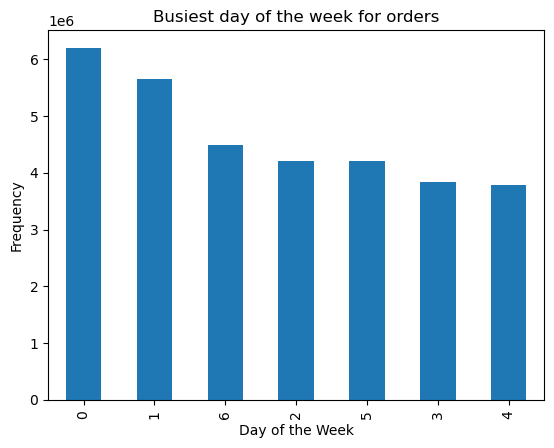

In [90]:
# Hist chart of busiest day of the week for order
df_all['orders_day_of_week'].value_counts().plot.bar()
plt.title('Busiest day of the week for orders')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
#Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest day of the week.png'))

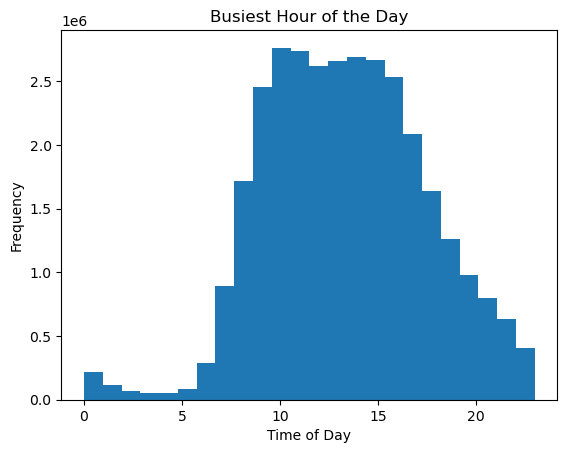

In [91]:
# Viz of the busiest hour of day for order
busiest_hod = df_all['order_hour_of_day'].plot.hist(bins = 24)

plt.xlabel('Time of Day')  
plt.title('Busiest Hour of the Day')
#Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busiest hour of day.png'))

In [63]:
# Create a list holding True/False values to the test np.randon.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

# Store 70% of the sample in the data frame big
big = df_all[dev]
# Store 30% of the sample in the data frame small
small = df_all[~dev] 

C:\Users\gra_j\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gra_j\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


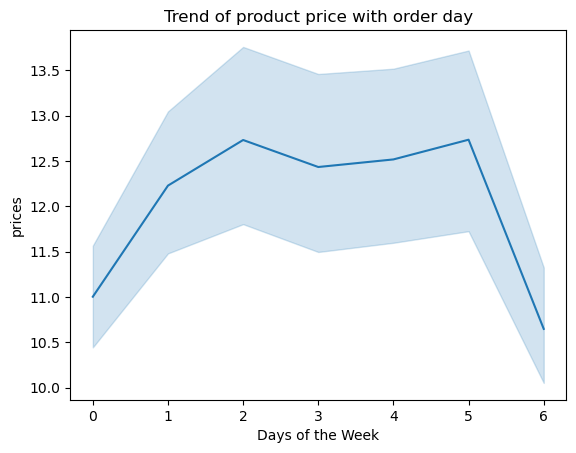

In [92]:
# create a line chart ploting the days of the week and the price 
line = sns.lineplot(data = small, x = 'orders_day_of_week',y = 'prices')
plt.xlabel('Days of the Week')
plt.ylabel('prices')
plt.title('Trend of product price with order day')
#Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'days when people spend the most .png'))

C:\Users\gra_j\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gra_j\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


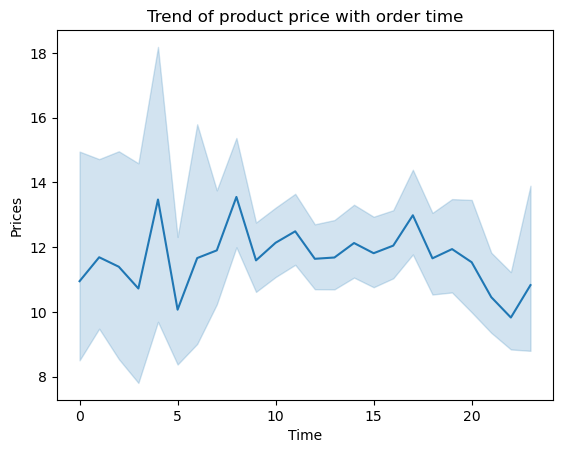

In [93]:
# create a line chart ploting the time of the day and the price 
line = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Trend of product price with order time')
#Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hours when people spent the most.png'))

In [66]:
df_all['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

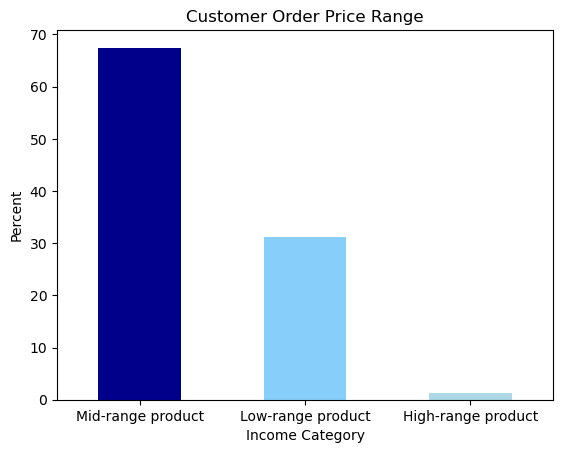

In [95]:
# Bar chart of price range
bar_price_range = (df_all['price_range_loc'].value_counts(normalize=True)*100).plot.bar(color = ['darkblue', 'lightskyblue', 'lightblue'])
plt.xlabel('Income Category')
plt.ylabel('Percent')
plt.title('Customer Order Price Range')
plt.xticks(rotation=0)
# Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer order price range.png'))

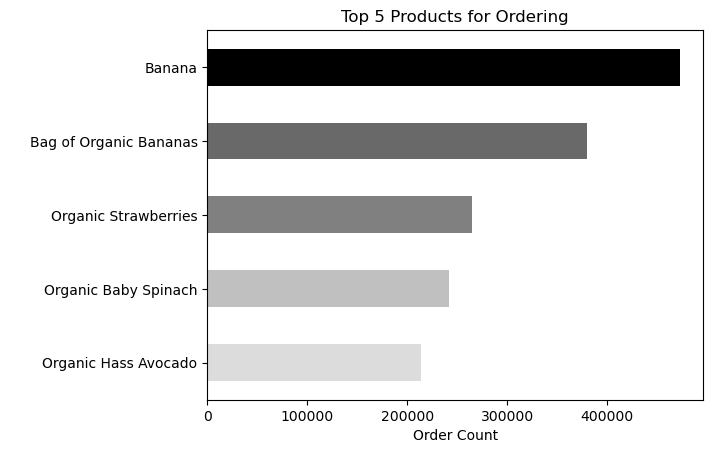

In [104]:
#Finding most popular products
favor_product=df_all['product_name'].value_counts(dropna=False).head(5).sort_values(ascending= True).plot.barh(color = ['gainsboro', 'silver', 'grey', 'dimgrey', 'black'  ])

plt.title('Top 5 Products for Ordering') 
plt.xlabel('Order Count')  
plt.ylabel(' ')  
#Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Top 5 favorite products.png'))

In [ ]:
# Finding most popular department
favor_dept=df_all['department_id'].value_counts(dropna=False).head(5)

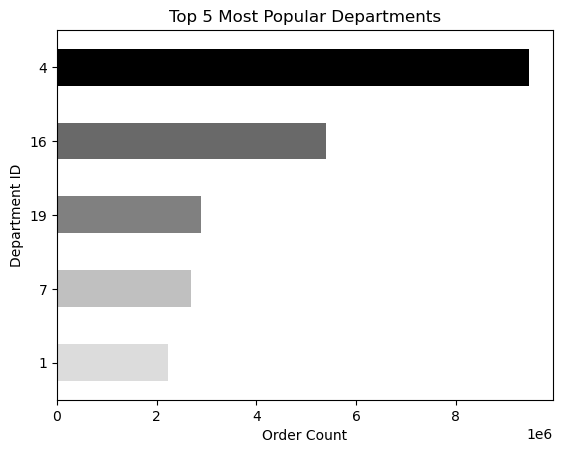

In [105]:
#plot the top 5  most popular department
favor_dept=df_all['department_id'].value_counts(dropna=False).head(5).sort_values(ascending= True).plot.barh(color = ['gainsboro', 'silver', 'grey', 'dimgrey', 'black'  ])

plt.title('Top 5 Most Popular Departments') 
plt.xlabel('Order Count') 
plt.ylabel('Department ID')  
#Save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Top 5 favorite department.png'))

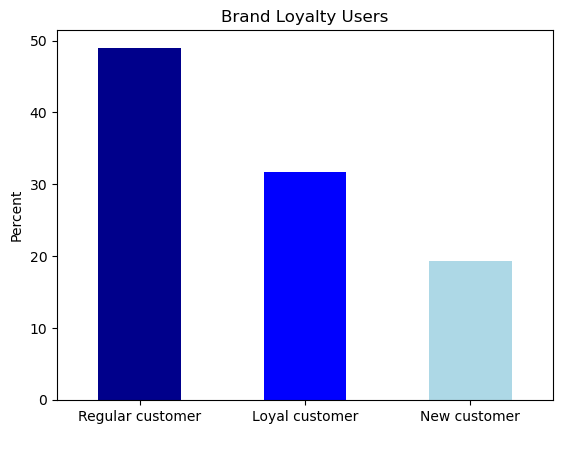

In [109]:
# Create bar chart for brand loyalty 
(df_all['loyalty_flag'].value_counts(normalize=True)*100).plot.bar(color=[ 'darkblue', 'blue', 'lightblue' ])
plt.title('Brand Loyalty Users') 
plt.ylabel('Percent')  
plt.xlabel(' ') 
plt.xticks(rotation=0)
# save the plot as a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty users.png')) # Save figure

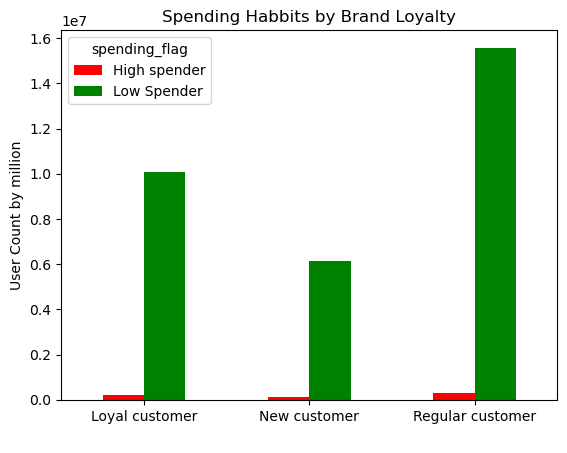

In [70]:
# Group spending flag by loyalty flag
grouped_counts = df_all.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['red','green'])
# Add labels and title
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Brand Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habbits by Brand Loyalty.png')) # Save figure

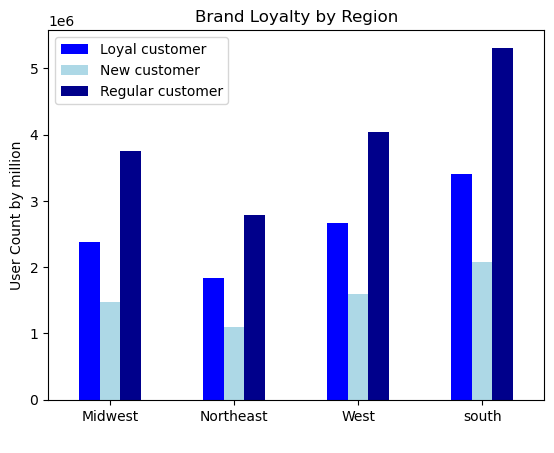

In [71]:
# Group loyalty flag by region
grouped_counts = df_all.groupby(['region', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot.bar(color=[ 'blue', 'lightblue', 'darkblue' ])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Brand Loyalty by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Brand Loyalty by Region.png')) # Save figure

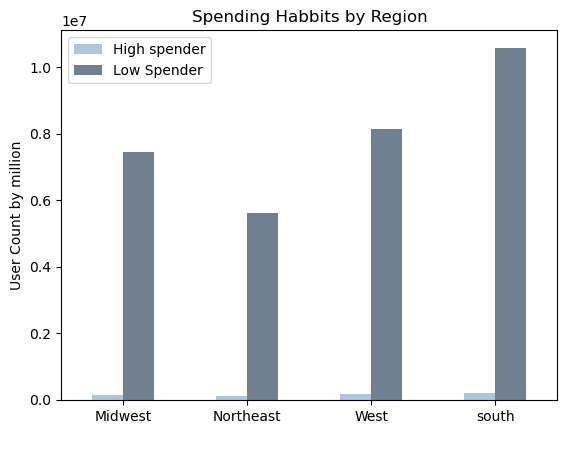

In [110]:
# Plot the bar chart 
df_all.groupby(['region', 'spending_flag']).size().unstack().plot.bar(color = ['lightsteelblue', 'slategrey'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habbits by Region.png')) # Save figure

In [73]:
# create age groups on given criterias
df_all.loc[(df_all['age']>=18) & (df_all['age']<=39), 'age_group'] ='young adult' 
df_all.loc[(df_all['age']>=40) & (df_all['age']<=59), 'age_group'] ='mid-age'
df_all.loc[(df_all['age']>=60), 'age_group'] ='senior'

In [74]:
df_all['age_group'].value_counts(dropna=False)

age_group
young adult    11164192
senior         11067255
mid-age        10173412
Name: count, dtype: int64

In [75]:
# creating percentage for age group 
age_group_percent = (df_all['age_group'].value_counts(normalize=True) * 100).sort_index()

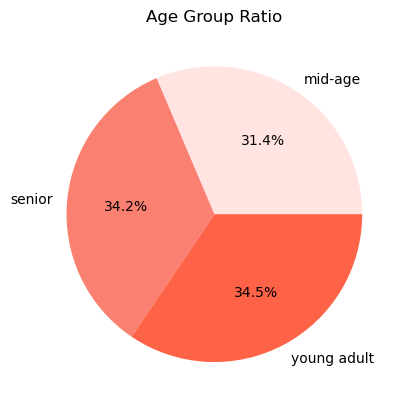

In [76]:
# Create Pie Chart  for age group
age_group_pie = plt.pie(age_group_percent, labels=age_group_percent.index, autopct='%1.1f%%',  colors=['mistyrose', 'salmon','tomato'])
plt.title('Age Group Ratio')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age group ratio pie.png'))

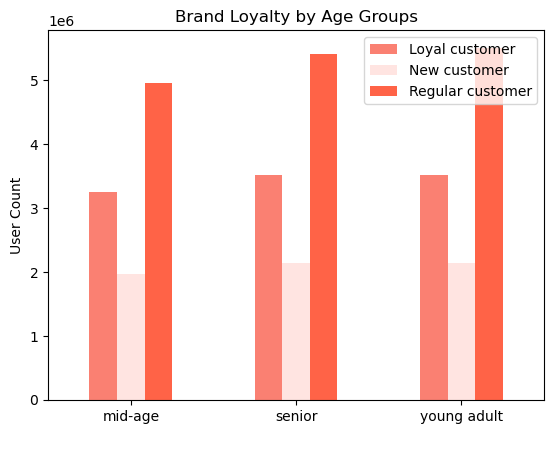

In [77]:
# plot brand loyalty by age group 
df_all.groupby(['age_group', 'loyalty_flag']).size().unstack().plot.bar(color=['salmon', 'mistyrose','tomato'])
# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Brand Loyalty by Age Groups.png')) # Save figure

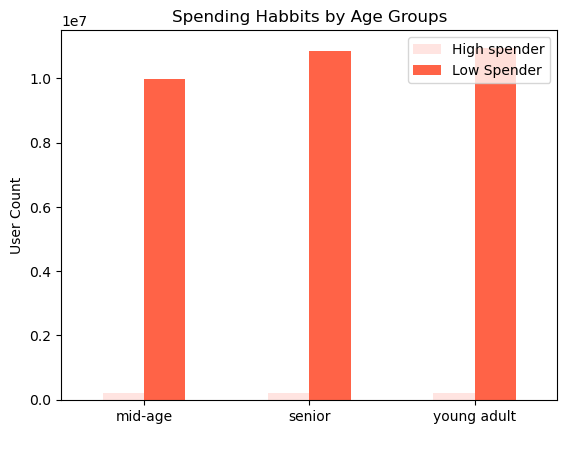

In [78]:
# plot Spending Habbits by Age Groups
df_all.groupby(['age_group', 'spending_flag']).size().unstack().plot.bar(color=[ 'mistyrose','tomato'])
# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habbits by Age Groups.png')) # Save figure

In [79]:
# create income groups on given criterias
df_all.loc[(df_all['income']>=25903) & (df_all['income']<=55000), 'income_group'] ='low-class' 
df_all.loc[(df_all['income']>=55001) & (df_all['income']<=149131), 'income_group'] ='middle-class'
df_all.loc[(df_all['income']>=149132), 'income_group'] ='upper-class'

In [80]:
df_all['income_group'].value_counts(dropna=False)

income_group
middle-class    23447023
low-class        4739985
upper-class      4217851
Name: count, dtype: int64

In [81]:
# creating percentage for income group 
income_group_percent = (df_all['income_group'].value_counts(normalize=True) * 100).sort_index()

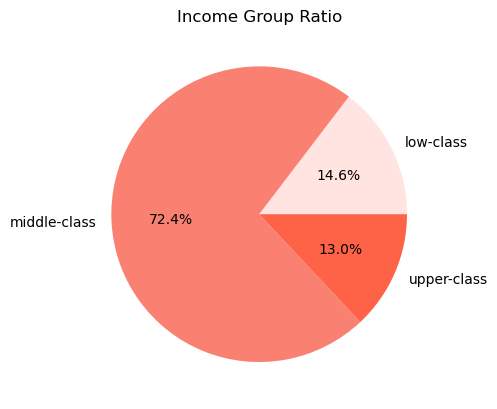

In [82]:
# Create Pie Chart  for income group
income_group_pie = plt.pie(income_group_percent, labels=income_group_percent.index, autopct='%1.1f%%',  colors=['mistyrose', 'salmon','tomato'])
plt.title('Income Group Ratio')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', ' group ratio pie.png'))

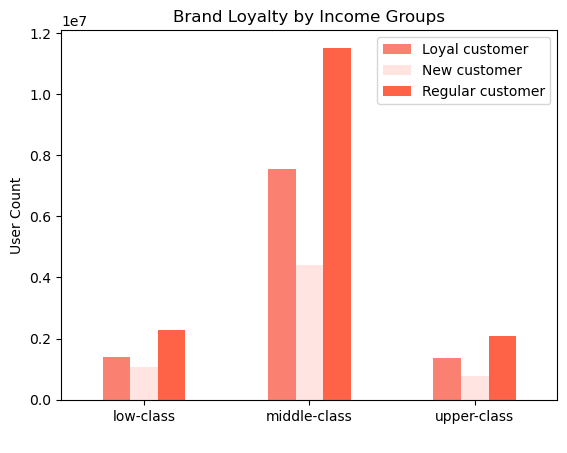

In [83]:
# plot Brand Loyalty by Income Groups
df_all.groupby(['income_group', 'loyalty_flag']).size().unstack().plot.bar(color=[ 'salmon','mistyrose','tomato'])
# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Income Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Brand Loyalty by Income Groups.png')) # Save figure

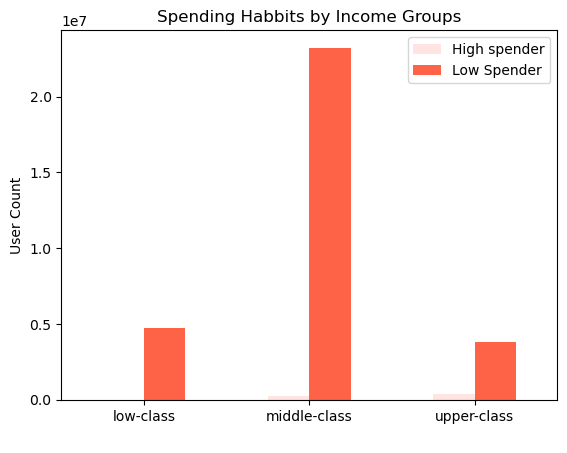

In [84]:
# plot Spending Habbits by Income Groups
df_all.groupby(['income_group', 'spending_flag']).size().unstack().plot.bar(color=[ 'mistyrose','tomato'])
# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Income Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Spending Habbits by Income Groups.png')) # Save figure